In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

# 1. Fundamentals

## Statistical Inference (GHV Chapter 4)

### Sampling distributions (GHV &sect; 4.1)

**Example:** Sampling distributions of $\bar{x}$ and $s^2$.

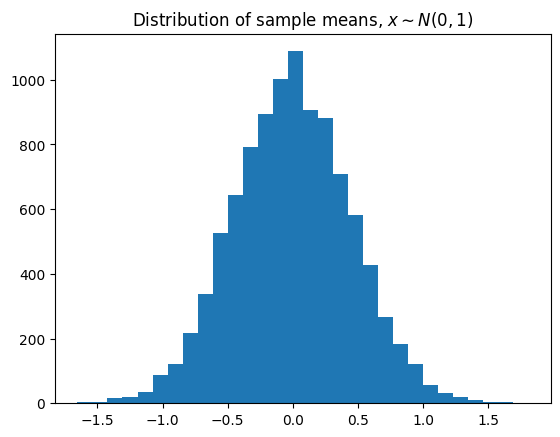

In [2]:
d = stats.norm()  # N(0, 1)
m = 10_000
n = 5
x = d.rvs(size=(m, n))
xbar = x.mean(axis=1)
plt.hist(xbar, bins=30)
plt.title("Distribution of sample means, $x\\sim N(0, 1)$")
plt.show()

### Standard error

- **standard error** means "standard deviation" or "estimate of standard deviation"

- $\displaystyle\operatorname{se}(\bar{x}) = \frac{\operatorname{se}(x)}{\sqrt{n}}$

### Bionomial proportion

- $y\sim \operatorname{Bin}(n, p)$

- $\displaystyle\hat{p}=\frac{y}{n}$

- $\displaystyle\operatorname{se}(\hat{p})=\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

**Example:** In a survey of university students, 57 out of 146 of male respondents say they regularly tweeze their eyebrows.

Use a binomial model to estimate the proportion $p$ of male student eyebrow tweezers, and its standard error.

### The Central Limit Theorem (CLT)

$$
\text{distribution of $\bar{x}$}\approx
N(\mu, \sigma^2/n)
$$

### Confidence intervals for the mean

$$
\text{$100(1-\alpha)$\%-CI} =
        [\bar{x} \pm z_{\alpha/2}\operatorname{se}(\bar{x})]
$$

**Example:**
Give the $95$\%-CI for the proportion of male student eyebrow tweezers.

### Combining means and proportions

$$
\operatorname{se}(x\pm y) = \sqrt{\operatorname{se}(x)^2 + \operatorname{se}(y)^2}\qquad (\text{$x$, $y$ indep.})
$$

**Example:**
In a survey of voting intentions, 57\% of 400 men 45\% of 600 women
say they plan to vote for the Republican candidate in an upcoming election. Estimate the **gender gap**,
its standard error, and its 99.9%-confidence interval.


### A goodness of fit test (cf. GHV &sect;4.6)

**Example:** The 1000 votes in an election with two candidates, A and B, are tallied $m=10$ batches of $n=100$. The counters report the following batch tallies $y_i$, $i < 10$, for candidate A:
$$
61,\, 64,\, 54,\, 61,\, 59,\, 58,\, 65,\, 62,\, 61,\, 59
$$
Candidate B protests, suggesting these results exhibit implausible uniformity.
Does he have a case?
Analyze using the **test statistic**
$$
T = \left(\frac1{\bar{y}} + \frac1{n - \bar{y}}\right)\sum_{i<m} (y_i - \bar{y})^2.
$$

## Simulation (GHV Chapter 5)